In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_vehicle_data.csv')
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3,age
0,-0.118567,5.59,-0.242894,False,True,False,True,False,False,-0.153567
1,0.341223,9.54,0.168830,True,False,False,True,False,False,0.189843
2,1.162275,9.85,-0.760123,False,True,False,True,False,False,-1.183795
3,-0.282777,4.15,-0.803868,False,True,False,True,False,False,0.876661
4,0.291959,6.87,0.154677,True,False,False,True,False,False,-0.153567


# Multiple linear regression

Mean Squared Error (MSE): 0.18193863959641898

Model Coefficients:
               Coefficient
Kms_Driven        0.012276
age              -0.375748
Present_Price     0.866248


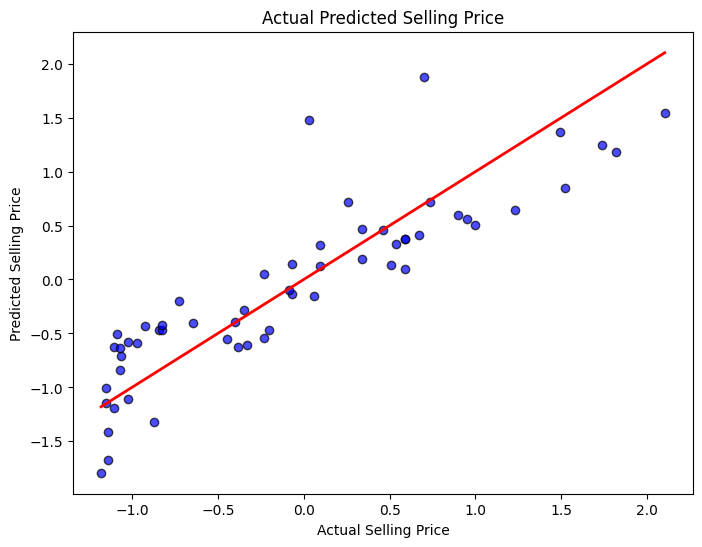

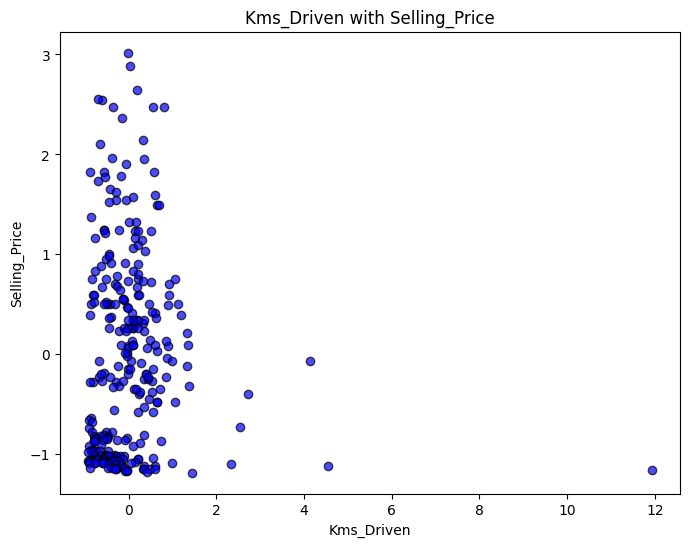

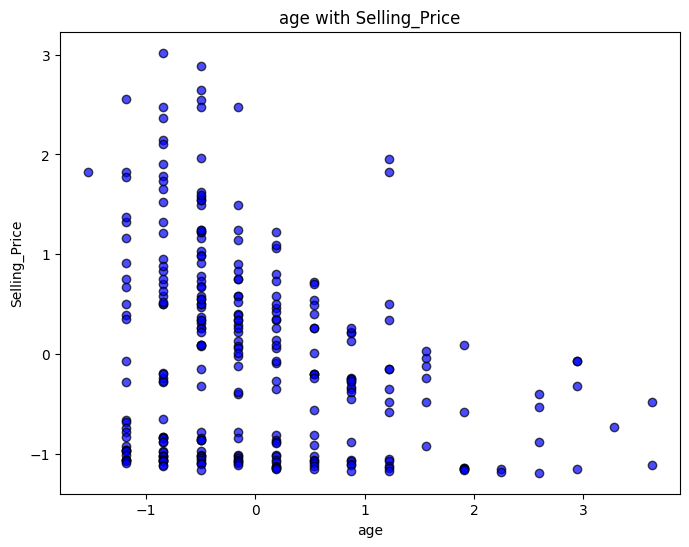

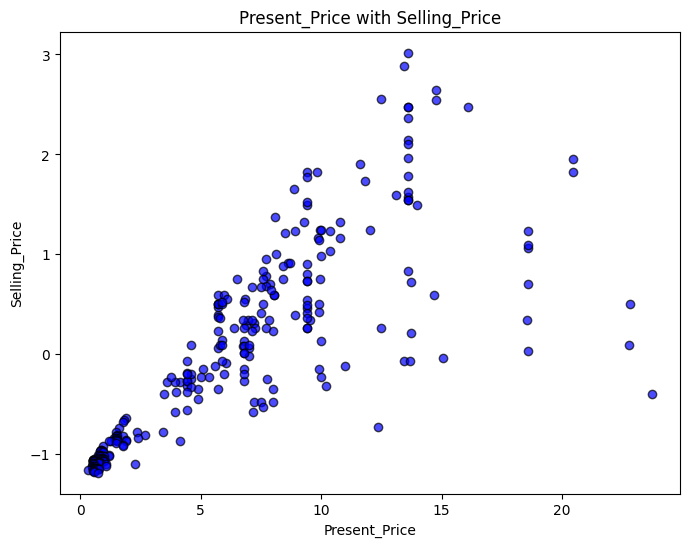

In [61]:
def multiple_linear_regression(df, features, target):
  
    X = df[features]  
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')
    
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print("\nModel Coefficients:")
    print(coefficients)
   
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2) 
    plt.title("Actual Predicted Selling Price")
    plt.xlabel("Actual Selling Price")
    plt.ylabel("Predicted Selling Price")
    plt.show()

    for feature in features:
        plt.figure(figsize=(8, 6))
        plt.scatter(df[feature], df[target], color='blue', edgecolors='k', alpha=0.7)
        plt.title(f"{feature} with {target}")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()
    return model, mse, coefficients

features = ['Kms_Driven', 'age', 'Present_Price']
target = 'Selling_Price'

model, mse, coefficients = multiple_linear_regression(df, features, target)


# KNN regresser

Mean Squared Error (MSE): 0.05318777306504572


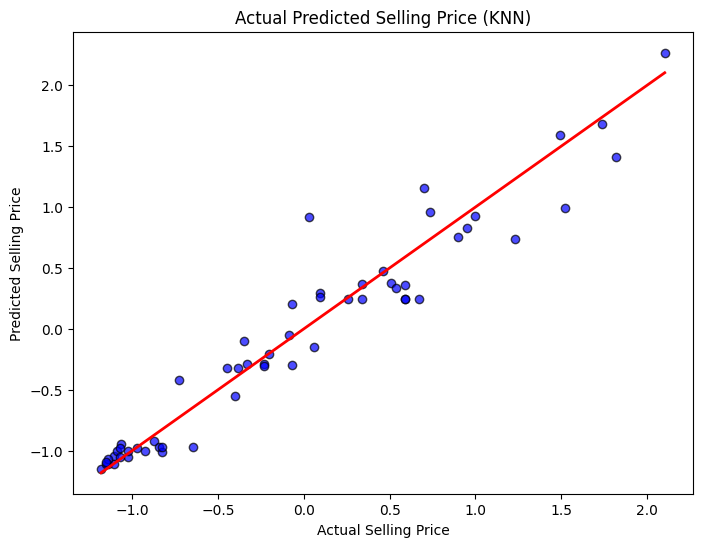

<Figure size 800x600 with 0 Axes>

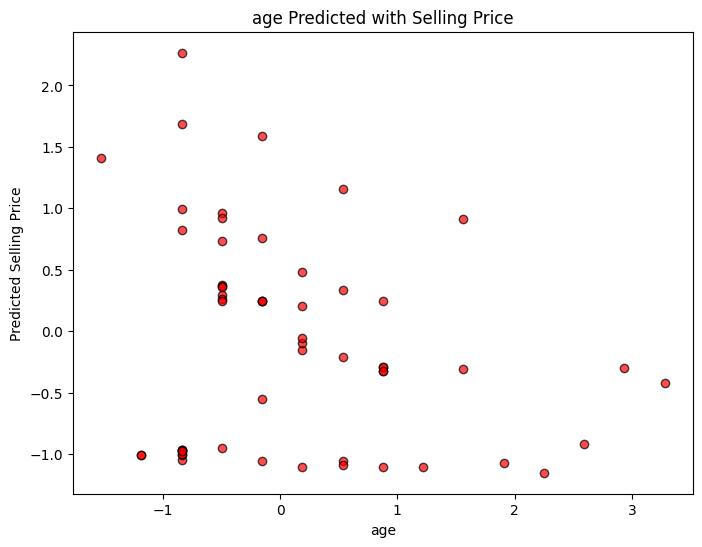

<Figure size 800x600 with 0 Axes>

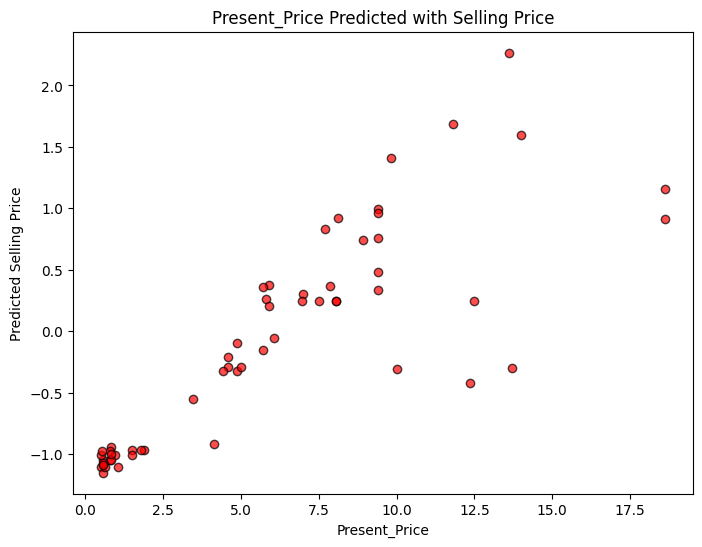

<Figure size 800x600 with 0 Axes>

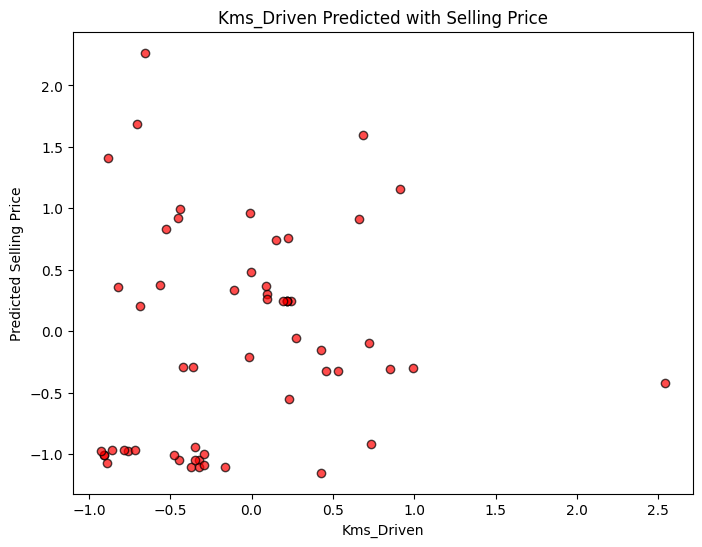

In [62]:
def knn_regressor(df):
    features1 = ['age', 'Present_Price', 'Kms_Driven']
    X = df[features1]  
    y = df['Selling_Price'] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsRegressor(n_neighbors=5)  
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  
    plt.title("Actual Predicted Selling Price (KNN)")
    plt.xlabel("Actual Selling Price")
    plt.ylabel("Predicted Selling Price")
    plt.show()

    for feature in features1:
        plt.figure(figsize=(8, 6))

        plt.figure(figsize=(8, 6))
        plt.scatter(X_test[feature], y_pred, color='red', edgecolors='k', alpha=0.7, label='Predicted Selling Price')
        plt.title(f"{feature} Predicted with Selling Price")
        plt.xlabel(feature)
        plt.ylabel('Predicted Selling Price')
        plt.show()

knn_regressor(df)
